# Data Cleaning and Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("housing.csv")

## Data : It is a housing survey done in califonia in 1990s and it is a dirty dataset which requires preprocess

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Finding missing data

In [9]:
missing = df.isnull().sum()
print(missing)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [10]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [11]:
missing = df.isnull().sum()
print(missing)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#### cleaning

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.drop(columns= ['longitude','latitude'] , axis=1 , inplace=True)
# because these are mostly similar and do not provide a huge knowledge about the dataset

In [15]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')


In [16]:
df.drop(columns =['total_bedrooms'],axis=1,inplace=True)
# since no of rooms already gives info we do not need number of bedrooms

## Now univariate and bivariate analysis

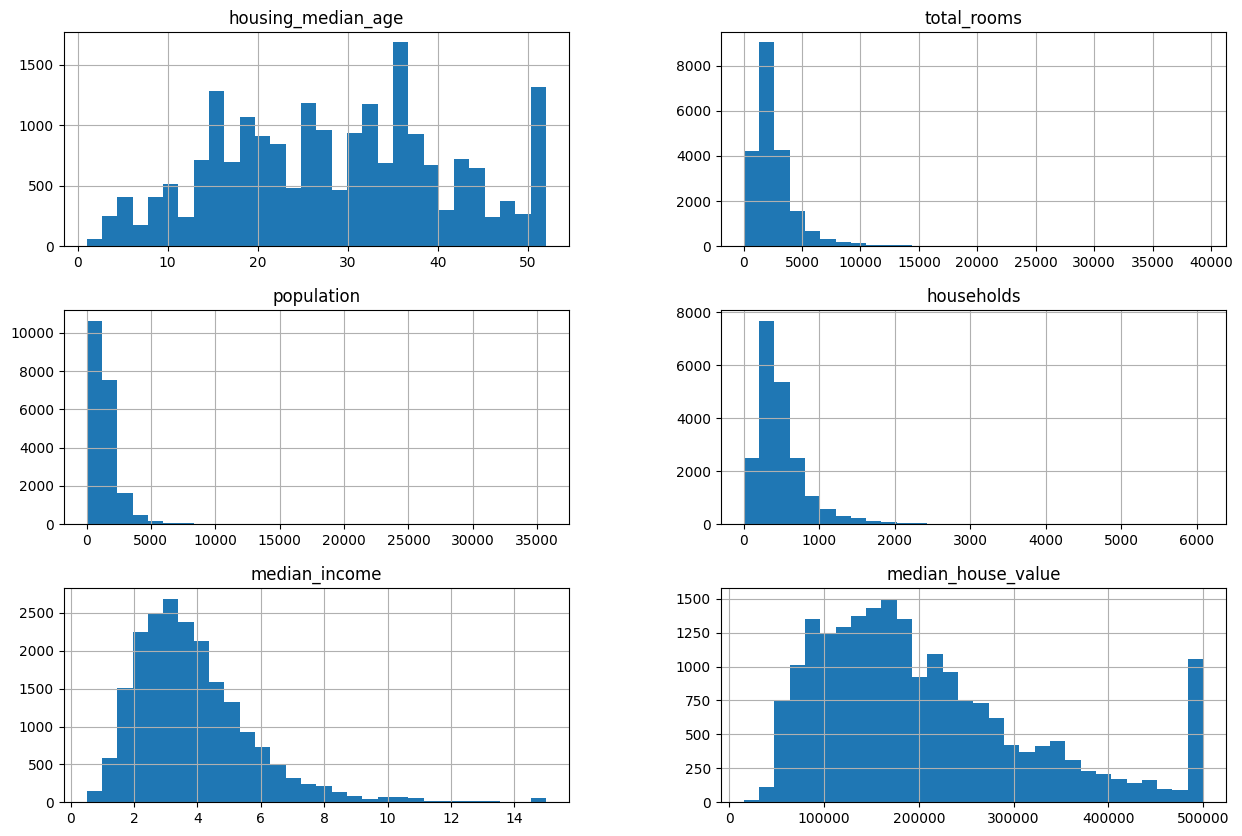

In [18]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

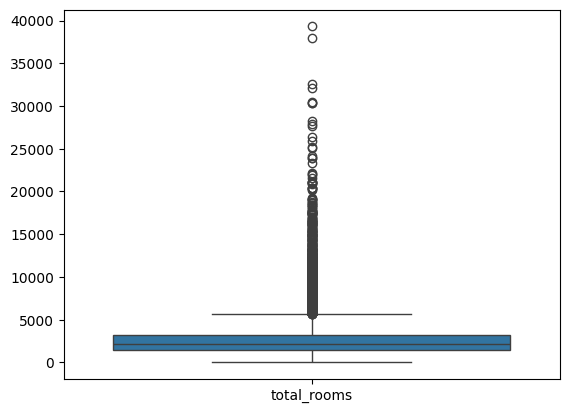

In [19]:
sns.boxplot(data=df[['total_rooms']])  
plt.show()

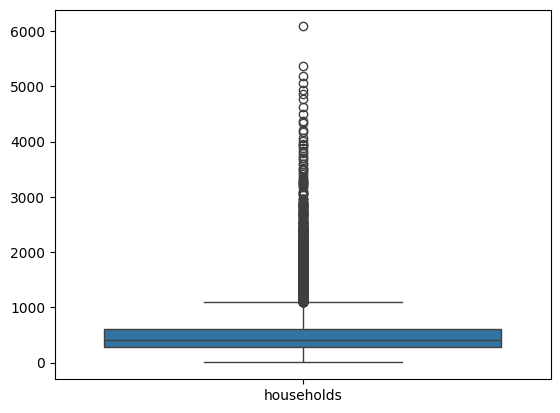

In [20]:
sns.boxplot(data=df[['households']])  
plt.show()

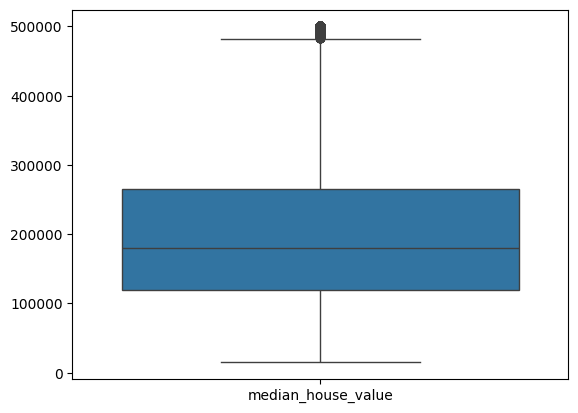

In [21]:
sns.boxplot(data=df[['median_house_value']])  
plt.show()

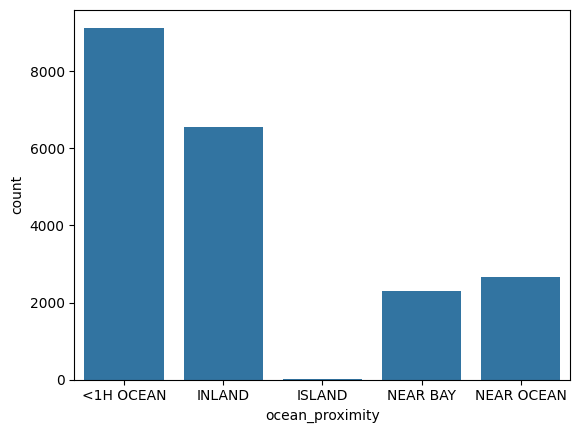

In [22]:
sns.countplot(data=df, x='ocean_proximity')
plt.show()

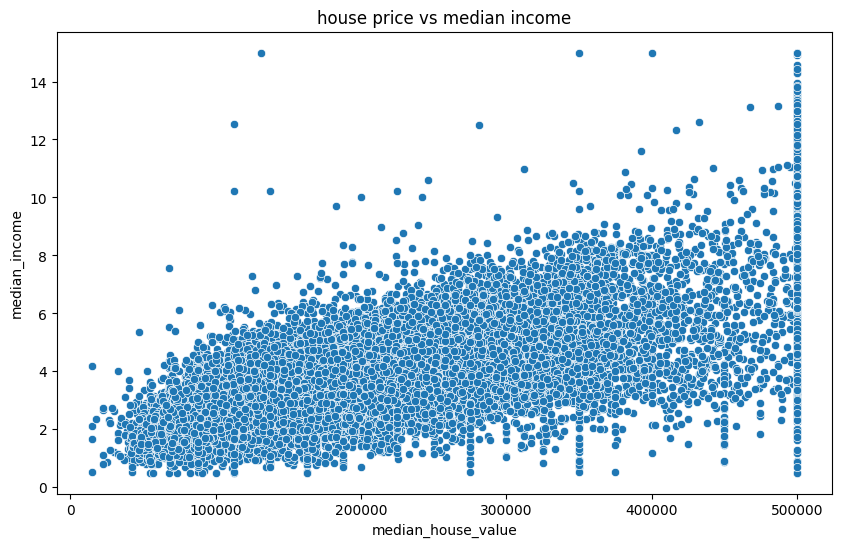

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_house_value', y='median_income', data=df)
plt.title('house price vs median income')
plt.show()

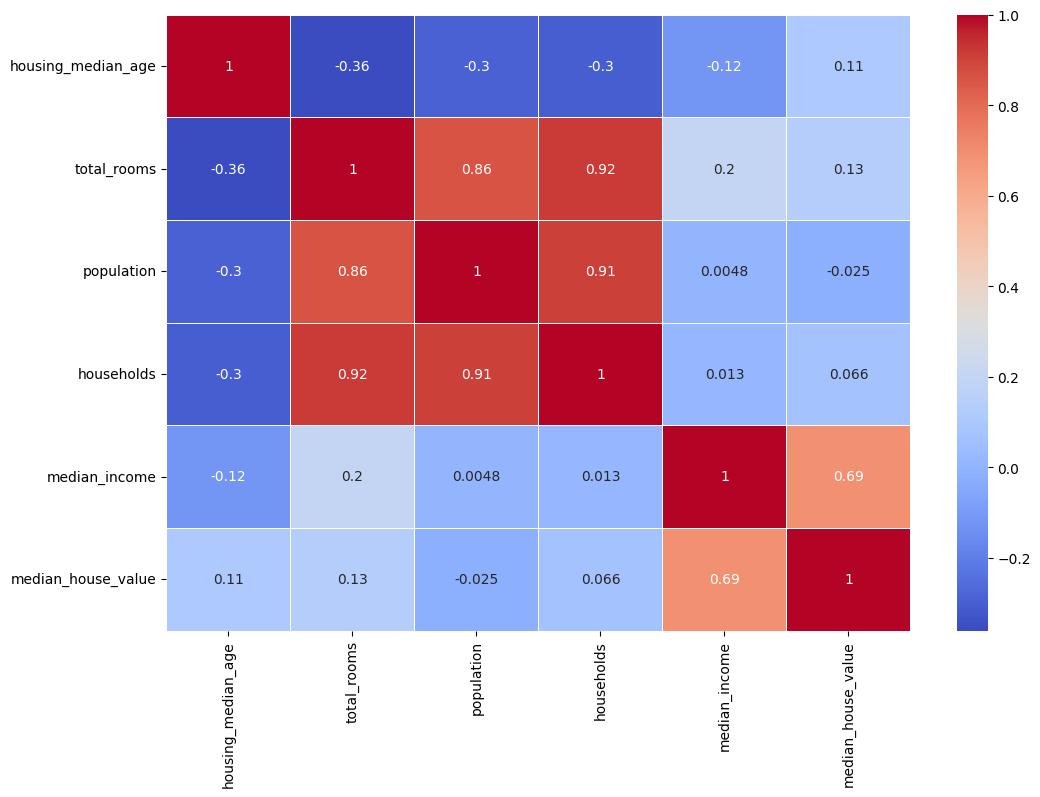

In [24]:
plt.figure(figsize=(12, 8))
numerical = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

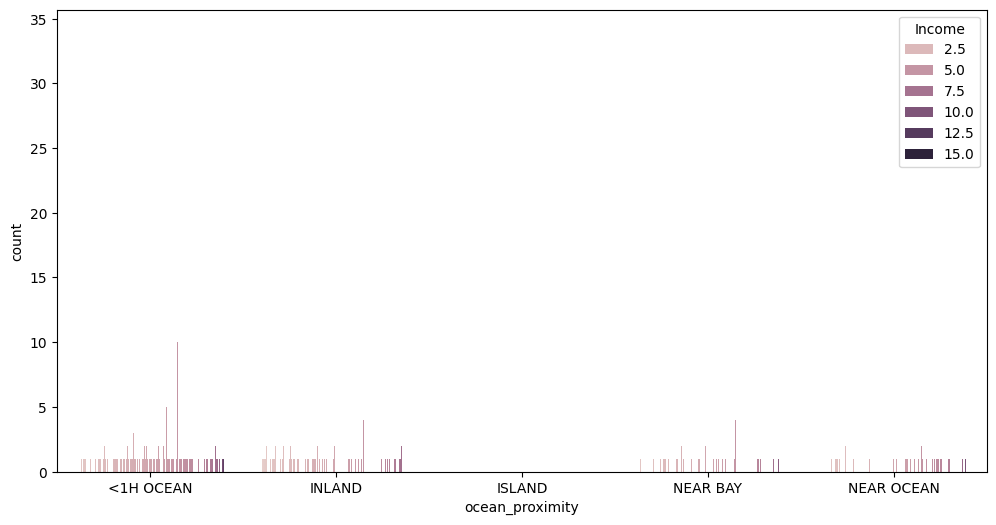

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ocean_proximity', hue='median_income')
plt.legend(title='Income')
plt.show()

##### t -test

In [28]:
from scipy import stats


neigh_1 = df[df['ocean_proximity'] == 'NEAR BAY']['median_house_value']
neigh_2 = df[df['ocean_proximity'] == 'NEAR OCEAN']['median_house_value']

# Perform independent T-test
t_stat, p_value = stats.ttest_ind(neigh_1, neigh_2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 2.796597171007359, P-value: 0.00518433462827199
